<a href="https://colab.research.google.com/github/nikenarina/Statistics_For_DS_Athon/blob/main/Tugas_Data_Science_Statistics_for_Data_Science_Niken_Arina_Pratiwi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 align="center"> DATA SCIENCE CHALLENGE <h1/>

## Statistics for Data Science with Python

_**This notebook is submitted to complete Telkom Athon Batch 5's assignment due Wednesday, June 12th 2024**_

## Author:
Niken Arina Pratiwi - 970267

## Dataset:

#### Human Resources
https://drive.google.com/file/d/1lqq19IGrqvjj42O8VHeelF9PrJihFAhA/view?usp=drive_link

In [1]:
from google.colab import files
uploaded = files.upload()

Saving human_resources.csv to human_resources.csv


In [2]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['human_resources.csv']))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Statistika Deskriptif

### Mean

In [5]:
data = pd.DataFrame(df)
data = data.apply(pd.to_numeric, errors='coerce')
data.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
sales                           NaN
salary                          NaN
dtype: float64

### Median

In [6]:
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
sales                       NaN
salary                      NaN
dtype: float64

### Mode

In [7]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,NaN,NaN
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data['average_montly_hours'].value_counts()

average_montly_hours
135    153
156    153
149    148
151    147
160    136
      ... 
297      7
288      6
299      6
96       6
303      6
Name: count, Length: 215, dtype: int64

### Range

In [9]:
data.max() - data.min()

satisfaction_level         0.91
last_evaluation            0.64
number_project             5.00
average_montly_hours     214.00
time_spend_company         8.00
Work_accident              1.00
left                       1.00
promotion_last_5years      1.00
sales                       NaN
salary                      NaN
dtype: float64

### Variance

In [10]:
data.var()

satisfaction_level          0.061817
last_evaluation             0.029299
number_project              1.519284
average_montly_hours     2494.313175
time_spend_company          2.131998
Work_accident               0.123706
left                        0.181411
promotion_last_5years       0.020817
sales                            NaN
salary                           NaN
dtype: float64

### Standard Deviation

In [11]:
data.std()

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
sales                          NaN
salary                         NaN
dtype: float64

### IQR

In [12]:
data.quantile(0.75) - data.quantile(0.25)

satisfaction_level        0.38
last_evaluation           0.31
number_project            2.00
average_montly_hours     89.00
time_spend_company        1.00
Work_accident             0.00
left                      0.00
promotion_last_5years     0.00
sales                      NaN
salary                     NaN
dtype: float64

### Outliers

In [13]:
def get_outliers(x):

    # 25th dan 75th percentile
    p75 = x.quantile(0.75)
    p25 = x.quantile(0.25)
    # IQR (selisih 25th dan 75th percentile)
    iqr = p75 - p25

    # "Minimum non-outlier value": 25th percentile - 1.5 * IQR
    min_val = p25 - (1.5*iqr)
    # "Maximum non-outlier value": 75th percentile + 1.5 * IQR
    max_val = p75 + (1.5*iqr)

    # Apapun di bawah minimum atau diatas maximum, disebut sebagai outlier
    outliers = x[(x < min_val) | (x > max_val)]
    return outliers

In [14]:
get_outliers(df['average_montly_hours'])

Series([], Name: average_montly_hours, dtype: int64)

## Distribusi Data

In [15]:
import matplotlib
import matplotlib.pyplot as plt

(array([ 351.,  885., 2371., 1590., 1372., 1518., 1423., 1970., 1669.,
        1850.]),
 array([0.36 , 0.424, 0.488, 0.552, 0.616, 0.68 , 0.744, 0.808, 0.872,
        0.936, 1.   ]),
 <BarContainer object of 10 artists>)

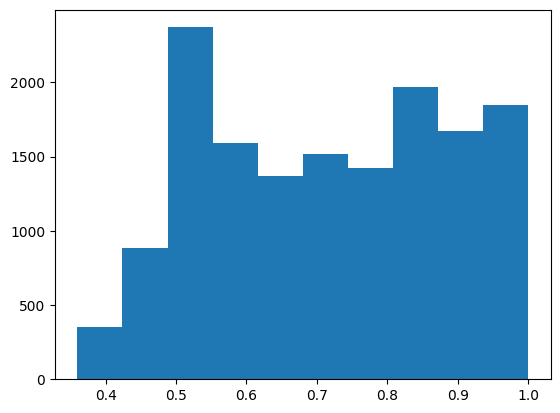

In [16]:
plt.hist(data['last_evaluation'])

(array([ 367., 1240., 2733., 1722., 1628., 1712., 1906., 2240., 1127.,
         324.]),
 array([ 96. , 117.4, 138.8, 160.2, 181.6, 203. , 224.4, 245.8, 267.2,
        288.6, 310. ]),
 <BarContainer object of 10 artists>)

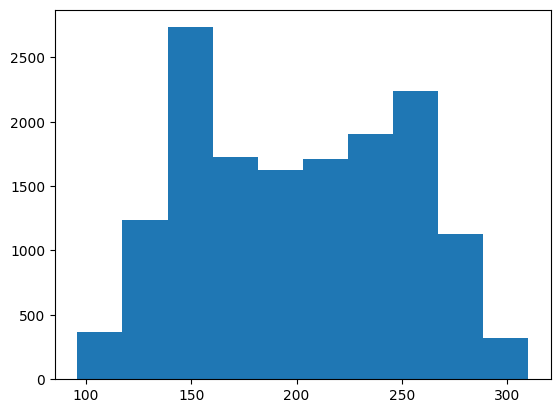

In [17]:
plt.hist(data['average_montly_hours'])

## Korelasi

In [18]:
import seaborn as sns
import scipy.stats

In [19]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,NaN,NaN
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,NaN,NaN
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,NaN,NaN
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,NaN,NaN
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,NaN,NaN
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,NaN,NaN
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,NaN,NaN
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,NaN,NaN
sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Heatmap

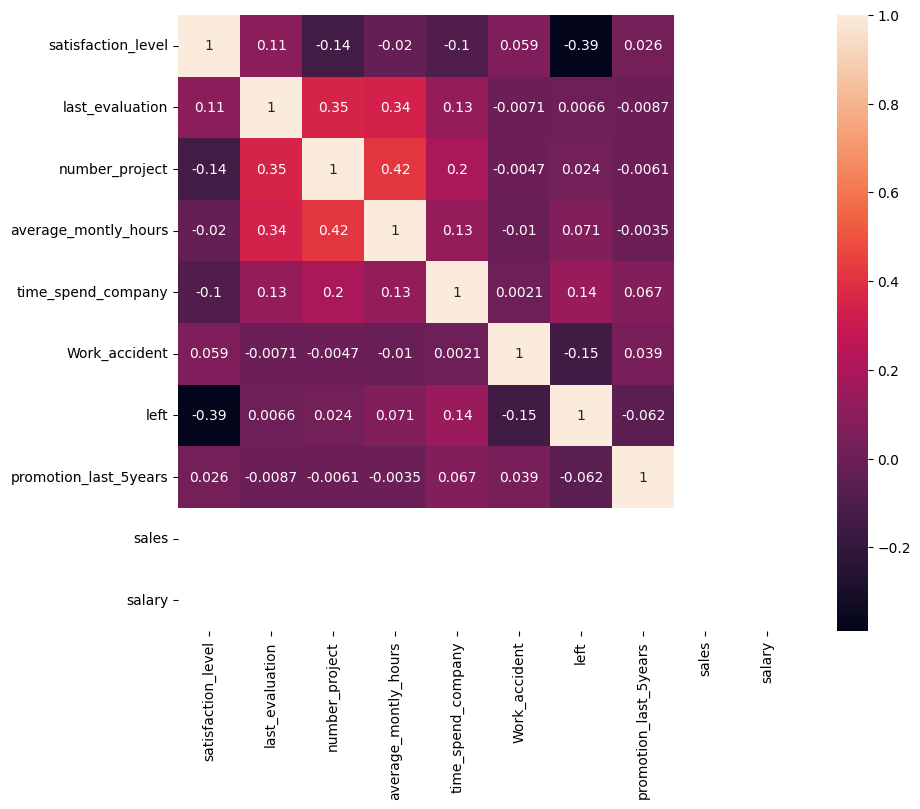

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

## Analisa Hubungan Sebab Akibat Variabel Kontinu

Kepuasan pegawai (***satisfaction_level***) vs Rata-rata jam kerja per bulan ***(average_montly_hours***)

### Hipotesa

*   $H\_0: µ\_1 = µ\_2$ ("Tidak ada hubungan antara level kepuasan dengan rata-rata jam kerja per bulan")
*   $H\_1: µ\_1 ≠ µ\_2$ ("Ada hubungan antara level kepuasan dengan rata-rata jam kerja per bulan")


### Regplot

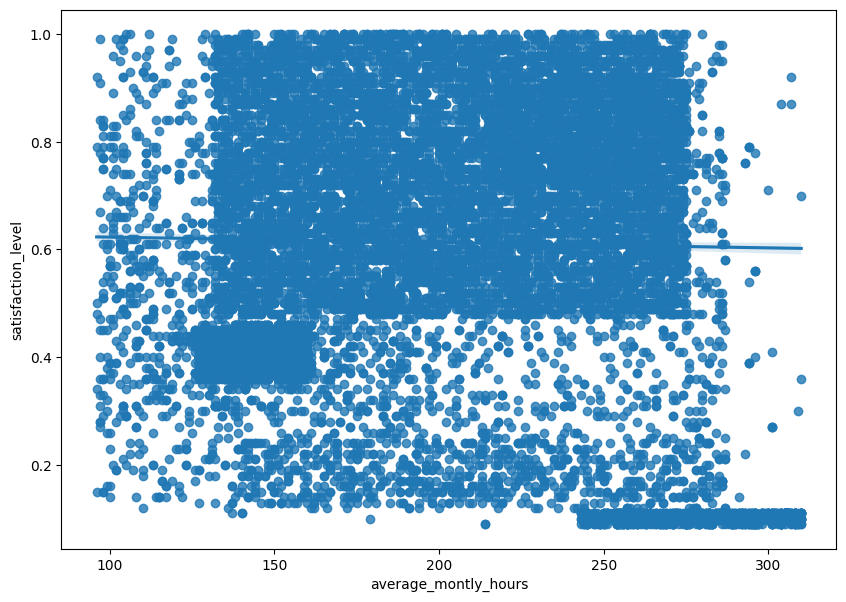

In [21]:
plt.figure(figsize = (10,7))
sns.regplot(y='satisfaction_level',x='average_montly_hours', data = data)
plt.show()

### Pearson Test

In [22]:
scipy.stats.pearsonr(data['satisfaction_level'], data['average_montly_hours'])

PearsonRResult(statistic=-0.020048113219472995, pvalue=0.014075035446900105)

### **Kesimpulan:**
Pearson Test antara level kepuasan pegawai (satisfaction_level) dengan rata-rata jam kerja per bulan (average_montly_hours) menghasilkan p value < 0.05, sehingga H0 dapat ditolak.


> **Terdapat hubungan antara level kepuasan pegawai dengan rata-rata jam kerja per bulan.**



## Analisa Hubungan Sebab Akibat Variabel Diskrit

Kecelakaan kerja (***Work_accident***) vs Promosi 5 tahun terakhir (***promotion_last_5years***)

### Hipotesa

*   $H\_0: µ\_1 = µ\_2$ ("Tidak ada hubungan antara kecelakaan kerja dengan promosi 5 tahun terakhir")
*   $H\_1: µ\_1 ≠ µ\_2$ ("Ada hubungan antara kecelakaan kerja dengan promosi 5 tahun terakhir")

### Cross Tab

In [23]:
cont_table  = pd.crosstab(data['Work_accident'], data['promotion_last_5years'])
cont_table

promotion_last_5years,0,1
Work_accident,,
0,12587,243
1,2093,76


### Chi-Squared Test

In [24]:
scipy.stats.chi2_contingency(cont_table, correction = False)

Chi2ContingencyResult(statistic=23.10152183063834, pvalue=1.5366902583119816e-06, dof=1, expected_freq=array([[12557.13047537,   272.86952463],
       [ 2122.86952463,    46.13047537]]))

### **Kesimpulan:**
Chi-Squared Test antara kecelakaan kerja (***Work_accident***) dengan promosi 5 tahun terakhir (***promotion_last_5years***) menghasilkan p value > 0.05, sehingga H0 tidak dapat ditolak.


> **Tidak terdapat hubungan antara kecelakaan kerja dengan promosi 5 tahun terakhir.**

## Analisa Hubungan Sebab Akibat Variabel Multi Kategori

Kelompok gaji (***Salary***) vs tingkat kepuasan (***satisfaction_level***)

### Hipotesa

*   $H\_0: µ\_1 = µ\_2$ ("Tidak ada hubungan antara gaji dengan tingkat keppuasan")
*   $H\_1: µ\_1 ≠ µ\_2$ ("Ada hubungan antara gaji dengan tingkat keppuasan")

### ANOVA

In [25]:
scipy.stats.levene(df[df['salary'] == 'low']['satisfaction_level'],
                   df[df['salary'] == 'medium']['satisfaction_level'],
                   df[df['salary'] == 'high']['satisfaction_level'],
                   center='mean')

LeveneResult(statistic=31.446386484779843, pvalue=2.3527000369647913e-14)

In [26]:
low_eval = df[df['salary'] == 'low']['satisfaction_level']
medium_eval = df[df['salary'] == 'medium']['satisfaction_level']
high_eval = df[df['salary'] == 'high']['satisfaction_level']

In [27]:
f_statistic, p_value = scipy.stats.f_oneway(low_eval, medium_eval, high_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 18.960895741998826, P-Value: 5.967355425747657e-09


### **Kesimpulan:**
ANOVA Test antara kelompok gaji (***Salary***) dengan tingkat kepuasan (***satisfaction_level***) menghasilkan p value < 0.05, sehingga H0 dapat ditolak.


> **Terdapat hubungan antara gaji dengan kepuasan kerja.**